<a href="https://colab.research.google.com/github/dp1500/predicting-automobile-failure/blob/main/predicting_automobile_failure_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv("/content/TDS_Week_5_Dataset_1 - Sheet1.csv")
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure


# **EDA**

In [4]:
data.shape

(10000, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 703.2+ KB


In [ ]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000


In [ ]:
data.isnull().sum()

In [ ]:
data['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [ ]:
data['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [ ]:
#Plot the unique values
sns.countplot(data['Failure Type']).unique()

## A quick box plot


In [17]:
data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Failure Type'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


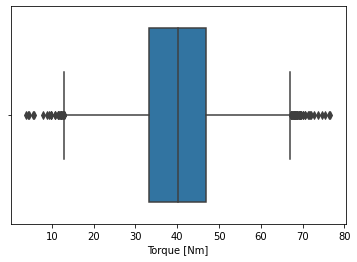

In [26]:
sns.boxplot(data['Torque [Nm]'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c7bc21590>,
      dtype=object)

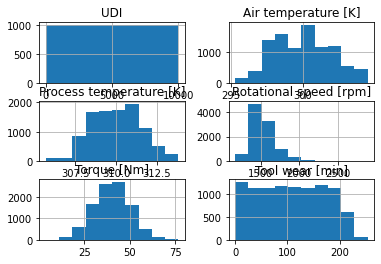

In [24]:
data.hist()

## Correlation Plot

In [27]:
#Correlation 

data.corr()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702
Air temperature [K],0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853
Process temperature [K],0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488
Rotational speed [rpm],-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223
Torque [Nm],0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093
Tool wear [min],-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000


In [28]:
 df = data

In [ ]:
for i in range(len(data)):
  if df['Failure Type'][i] == "Tool Wear Failure":
    df['Failure Type'][i] = 1
  else:
    df['Failure Type'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df['Failure Type'].value_counts()

0    10000
Name: Failure Type, dtype: int64

In [ ]:
df.shape

(10000, 9)